In [2]:
import keras

Using TensorFlow backend.


In [3]:
from keras.datasets import mnist

In [4]:
(x_train , y_train),(x_test , y_test) = mnist.load_data()

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
y_train.shape

(60000,)

In [7]:
import matplotlib.pyplot as plt

1

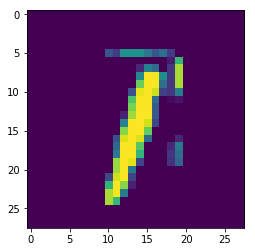

In [8]:
plt.imshow(x_train[67])
y_train[67]

In [12]:
# normalising the data
input_shape = (28,28,1)

x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train = x_train/255.
x_test = x_test/255.

In [13]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [14]:
x_train.shape

(60000, 28, 28, 1)

In [15]:
y_test.shape

(10000, 10)

# Buliding CNN model

In [16]:
from keras.models import Sequential
from keras.layers import Conv2D ,MaxPooling2D , Flatten , Dense , Dropout

In [17]:
model = Sequential()

In [18]:
model.add(Conv2D(32,3,activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,3,activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10,activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [19]:
# in conv2d first parameter is how many filters you want to use and 2 is for what is th size of filter
# in Dense layer first parameter is how many output unit will generate when input_shape is given

In [21]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [23]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               204928    
__________

In [24]:
model.fit(x_train,y_train,batch_size=512,epochs=5,verbose=1,validation_data=(x_test,y_test))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 49s 816us/step - loss: 0.5165 - acc: 0.8424 - val_loss: 0.1010 - val_acc: 0.9713
Epoch 2/5
60000/60000 [==============================] - 47s 788us/step - loss: 0.1203 - acc: 0.9642 - val_loss: 0.0572 - val_acc: 0.9826
Epoch 3/5
60000/60000 [==============================] - 47s 788us/step - loss: 0.0837 - acc: 0.9745 - val_loss: 0.0418 - val_acc: 0.9864
Epoch 4/5
60000/60000 [==============================] - 48s 793us/step - loss: 0.0662 - acc: 0.9793 - val_loss: 0.0352 - val_acc: 0.9885
Epoch 5/5
60000/60000 [==============================] - 47s 789us/step - loss: 0.0575 - acc: 0.9825 - val_loss: 0.0299 - val_acc: 0.9905


In [25]:
model.evaluate(x_test,y_test)

10000/10000 [==============================] - 3s 325us/step


[0.02991067842299817, 0.9905]

In [26]:
pred = model.predict(x_test)

In [27]:
pred[98]

array([2.1105814e-05, 1.6244158e-09, 7.8806102e-07, 1.1604422e-08,
       7.6819909e-08, 4.4403793e-04, 9.9950004e-01, 3.3854020e-11,
       3.3928107e-05, 4.0195804e-08], dtype=float32)

In [28]:
pred[6785].argmax() == y_test[6785].argmax()

True

In [29]:
pred[4444].argmax() == y_test[4444].argmax()

True

In [30]:
pred[1422].argmax() == y_test[1422].argmax()

True

In [31]:
model.predict(x_test[789])

ValueError: Error when checking input: expected conv2d_1_input to have 4 dimensions, but got array with shape (28, 28, 1)

## Single image test

In [32]:
z=x_test[99]

In [33]:
z.shape

(28, 28, 1)

In [34]:
z = z.reshape(1,28,28,1)

In [45]:
z.shape

(1, 28, 28, 1)

In [46]:
new_pred = model.predict(z)

In [47]:
new_pred

array([[1.4935656e-08, 2.2667439e-10, 1.7063238e-08, 1.5422813e-07,
        5.7707075e-06, 6.0778476e-08, 1.4781929e-09, 8.0027312e-06,
        3.5333403e-06, 9.9998248e-01]], dtype=float32)

In [48]:
new_pred.argmax()

9

In [49]:
y_test[99].argmax()

9

In [50]:
x_test[99].shape

(28, 28, 1)

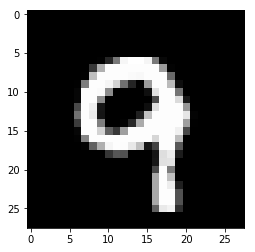

In [55]:
plt.imshow(x_test[99].reshape(28,28),cmap='gray')